In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Goodreads All Time Greatest Books 8k Data.csv')

## Removing 'Collections'

In [3]:
df['Book_Name'].str.contains('Collection | collection | Trilogy').any()

True

In [4]:
df = df[df['Book_Name'].str.contains('Collection | collection')==False]

In [5]:
df

,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
0,To Kill a Mockingbird,Harper Lee,4.27,"5,623,473","108,722","2,927,118","1,669,471","730,317","192,620","103,947"
1,1984,George Orwell,4.19,"4,134,439","98,891","1,956,290","1,345,678","588,373","158,757","85,341"
2,Fahrenheit 451,Ray Bradbury,3.97,"2,181,792","64,728","788,776","777,014","438,256","123,939","53,807"
3,Animal Farm,George Orwell,3.98,"3,521,050","81,746","1,310,631","1,229,834","676,221","200,989","103,375"
4,The Hobbit,J.R.R. Tolkien,4.28,"3,612,605","62,476","1,930,001","1,047,617","439,072","118,631","77,284"
...,...,...,...,...,...,...,...,...,...,...
7801,Winter in the Blood,James Welch,3.84,"3,536",355,"1,006","1,361",850,234,85
7802,The Inextinguishable Symphony: A True Story of...,Martin Goldsmith,4.20,"1,011",121,442,391,129,39,10
7803,The Moon Is Down,John Steinbeck,3.92,"25,470","2,068","7,210","10,651","6,135","1,188",286
7804,Ο ιππότης με τη σκουριασμένη πανοπλία,Robert Fisher,3.80,"22,768","1,830","7,278","7,169","5,555","1,951",815


In [6]:
df['Average_star'].describe()

count    7802.000000
mean        4.018371
std         0.273629
min         0.000000
25%         3.850000
50%         4.030000
75%         4.200000
max         5.000000
Name: Average_star, dtype: float64

<AxesSubplot:xlabel='Average_star', ylabel='Count'>

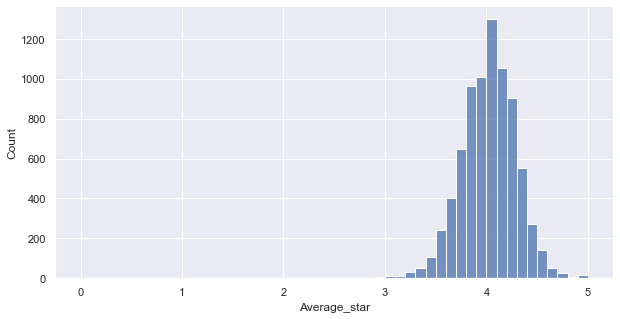

In [7]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.histplot(df['Average_star'], bins=50)

Most books have a rating around 4 starts

## Analysis by Author

Change STR columns to INT

In [8]:
for x in df[['Ratings', 'Reviews', '5_Star', '4_Star', '3_Star', '2_Star', '1_Star']]:
    df[x] = df[x].apply(lambda x: x.replace(',','')).astype(int)

Create a new dataframe to understand more about the authors

In [9]:
author_df = pd.DataFrame({
    'Author': df['Author'].unique(), # get a list of unique authors
    'Books_Published_Count': df.groupby('Author')['Book_Name'].count(), # group by author and count the number of books
    'Average_Rating_Total': round(df.groupby('Author')['Average_star'].mean(), 2), # group by author and calculate the average star rating
    'Ratings_Total': df.groupby('Author')['Ratings'].sum(), # group by author and calculate the total rating (sum)
    '5_Star_Total': df.groupby('Author')['5_Star'].sum(), # group by author and calculate the total 5 stars reviews (sum)
    '4_Star_Total': df.groupby('Author')['4_Star'].sum(), # group by author and calculate the total 4 stars reviews (sum)
    '3_Star_Total': df.groupby('Author')['3_Star'].sum(), # group by author and calculate the total 3 stars reviews (sum)
    '2_Star_Total': df.groupby('Author')['2_Star'].sum(), # group by author and calculate the total 2 stars reviews (sum)
    '1_Star_Total': df.groupby('Author')['1_Star'].sum() # group by author and calculate the total 1 stars reviews (sum)
})
author_df.drop(columns = ['Author'], axis=1, inplace = True)
author_df.reset_index(inplace=True)

In [10]:
author_df

,Author,Books_Published_Count,Average_Rating_Total,Ratings_Total,5_Star_Total,4_Star_Total,3_Star_Total,2_Star_Total,1_Star_Total
0,-Dell-,1,4.00,32,12,12,4,4,0
1,A. Nagoor Kani,2,3.89,800,335,228,106,61,70
2,A.A. Attanasio,1,4.16,500,224,171,75,23,7
3,A.A. Milne,5,4.34,492488,280633,131882,60361,12614,6998
4,A.A. Navis,1,4.00,3150,1099,1182,699,123,47
...,...,...,...,...,...,...,...,...,...
3766,مصطفى محمود,2,3.94,56838,22017,18067,10053,3837,2864
3767,يحيى بن شرف النووي,1,4.65,7052,5478,1004,365,107,98
3768,ปรีดี พนมยงค์,1,4.40,5,3,1,1,0,0
3769,柴門ふみ,1,3.85,13,3,6,3,1,0


### Top 5 Author with most published books

In [11]:
author_df[['Author', 'Books_Published_Count', 'Average_Rating_Total']].sort_values(by = 'Books_Published_Count', ascending=False).head(5)

,Author,Books_Published_Count,Average_Rating_Total
3481,V.C. Andrews,43,3.87
30,Agatha Christie,39,3.95
3273,Stephen King,39,4.00
2817,Philip K. Dick,36,3.78
470,C.S. Lewis,32,4.10


### Best rated authors

In [12]:
author_df[['Author', 'Average_Rating_Total', 'Ratings_Total']].sort_values(by='Average_Rating_Total', ascending=False).head(10)

,Author,Average_Rating_Total,Ratings_Total
1095,Francisco José Paoli Bolio,5.00,1
1488,Ismael Camacho Arango,5.00,2
611,Clemente Arranz Enjuto,5.00,1
2981,Robert Benjamin,5.00,1
3244,Staf Vivijs,5.00,2
3243,Spiros Zodhiates,5.00,2
1074,Florence Morris Rose,5.00,4
2866,Rafael Cadenas,4.89,27
2735,Paul Berna,4.86,7
957,Emily Cox,4.83,6


Here we see a big problem: there are authors with only a few very good ratings. So, authors who have published more books, have worst ratings.
So, the criteria to filter a "good author" could be authors with more than the total average ratings (94061)

In [13]:
author_df[['Author', 'Average_Rating_Total', 'Ratings_Total', 'Books_Published_Count']].query('Ratings_Total >= Ratings_Total.mean()').sort_values(by='Average_Rating_Total', ascending=False).head(10)

,Author,Average_Rating_Total,Ratings_Total,Books_Published_Count
411,Bill Watterson,4.66,409012,7
599,Chuck Dixon,4.51,215852,1
1517,J.K. Rowling,4.51,19798598,4
1087,Francine Rivers,4.49,505228,6
2390,Masashi Kishimoto,4.46,276678,5
3002,Robert Kapilow,4.46,124202,1
644,Corrie ten Boom,4.45,302414,1
1883,Jon Stone,4.45,123473,1
85,Alex Haley,4.44,156555,1
279,Art Spiegelman,4.44,643173,3


In [14]:
author_df['Books_Published_Count'].value_counts()

1     2543
2      497
3      244
4      134
5       95
6       62
7       52
8       34
9       28
11      13
13      13
10      11
12      10
14       8
15       5
24       4
22       3
16       3
18       3
39       2
17       2
32       1
36       1
19       1
27       1
43       1
Name: Books_Published_Count, dtype: int64

A new problem: there are authors that had published only a few books, other have published a lot. So, we're going to group them:
- only 1 book
- 2 to 4 books
- 5 to 10 books
- 11 to 13 books
- 14+ books

Authors with only 1 book

In [15]:
one_book = author_df[['Author', 'Average_Rating_Total', 'Ratings_Total', 'Books_Published_Count']].query('Ratings_Total >= Ratings_Total.mean() and Books_Published_Count == 1').sort_values(by='Average_Rating_Total', ascending=False).head(5)

Authors with 2 - 4 books

In [16]:
two_four_books = author_df[['Author', 'Average_Rating_Total', 'Ratings_Total', 'Books_Published_Count']].query('Ratings_Total >= Ratings_Total.mean() and Books_Published_Count > 1 and Books_Published_Count <= 4').sort_values(by='Average_Rating_Total', ascending=False).head(5)

Authors with 5 - 10 books

In [17]:
five_ten_books = author_df[['Author', 'Average_Rating_Total', 'Ratings_Total', 'Books_Published_Count']].query('Ratings_Total >= Ratings_Total.mean() and Books_Published_Count > 4 and Books_Published_Count <= 10').sort_values(by='Average_Rating_Total', ascending=False).head(5)

Authors with 11 - 13 books

In [18]:
eleven_thirteen_books = author_df[['Author', 'Average_Rating_Total', 'Ratings_Total', 'Books_Published_Count']].query('Ratings_Total >= Ratings_Total.mean() and Books_Published_Count > 10 and Books_Published_Count <= 13').sort_values(by='Average_Rating_Total', ascending=False).head(5)

Authors with more than 13 books

In [19]:
thirteen_more_books = author_df[['Author', 'Average_Rating_Total', 'Ratings_Total', 'Books_Published_Count']].query('Ratings_Total >= Ratings_Total.mean() and Books_Published_Count > 13').sort_values(by='Average_Rating_Total', ascending=False).head(5)

Create a dataframe with only the best authors from the previous analysis

In [20]:
best_authors_df = pd.concat([one_book, two_four_books, five_ten_books, eleven_thirteen_books, thirteen_more_books])

### The best authors:

In [21]:
best_authors_df

,Author,Average_Rating_Total,Ratings_Total,Books_Published_Count
599,Chuck Dixon,4.51,215852,1
3002,Robert Kapilow,4.46,124202,1
1883,Jon Stone,4.45,123473,1
644,Corrie ten Boom,4.45,302414,1
85,Alex Haley,4.44,156555,1
1517,J.K. Rowling,4.51,19798598,4
279,Art Spiegelman,4.44,643173,3
15,A.W. Tozer,4.38,97109,2
1407,Herman Wouk,4.35,114200,3
1169,Garth Nix,4.35,209368,2


Finding the best book of each author on the best_authors_df

In [22]:
best_authors_complete_df = best_authors_df.merge(df, how='inner')

In [23]:
best_authors_complete_df = best_authors_complete_df[['Author', 'Book_Name', 'Average_star']]

In [24]:
best_authors_complete_df

,Author,Book_Name,Average_star
0,Chuck Dixon,The Hobbit,4.51
1,Robert Kapilow,"Dr. Seuss's Green Eggs and Ham: For Soprano, B...",4.46
2,Jon Stone,The Monster at the End of this Book,4.45
3,Corrie ten Boom,The Hiding Place: The Triumphant True Story of...,4.45
4,Alex Haley,Roots: The Saga of an American Family,4.44
...,...,...,...
201,P.G. Wodehouse,Life at Blandings,4.35
202,P.G. Wodehouse,A Damsel in Distress,4.09
203,P.G. Wodehouse,What Ho!: The Best of Wodehouse,4.45
204,P.G. Wodehouse,The White Feather,3.76


In [25]:
# get the index of the row with the maximum value of Average_star for each Author
average_star_index = best_authors_complete_df.groupby('Author')['Average_star'].idxmax()

# filter the original dataframe based on the average_star_index
best_books_by_best_authors = best_authors_complete_df.loc[average_star_index]

### The best book of the BEST authors

In [26]:
best_books_by_best_authors

,Author,Book_Name,Average_star
12,A.W. Tozer,The Knowledge of the Holy,4.38
4,Alex Haley,Roots: The Saga of an American Family,4.44
10,Art Spiegelman,The Complete Maus,4.56
156,Astrid Lindgren,The Brothers Lionheart,4.35
134,Bernard Cornwell,Excalibur,4.42
21,Bill Watterson,It's a Magical World,4.73
0,Chuck Dixon,The Hobbit,4.51
3,Corrie ten Boom,The Hiding Place: The Triumphant True Story of...,4.45
87,David Gemmell,Shield of Thunder,4.37
175,Dr. Seuss,How the Grinch Stole Christmas!,4.37
